<a id="1"></a>
## 1.Loading Data

In [ ]:
import numpy as np          
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv("/content/SBIN.csv")

In [ ]:
data.head()

,Unnamed: 0,index,Date,Open,High,Low,Close,Volume
0,0,0,2016-01-04 09:15:00+05:30,226.70,226.70,225.60,226.20,103484
1,1,1,2016-01-04 09:16:00+05:30,226.20,226.40,226.00,226.30,62233
2,2,2,2016-01-04 09:17:00+05:30,226.30,226.55,225.90,225.90,58777
3,3,3,2016-01-04 09:18:00+05:30,226.00,226.20,225.90,226.15,30632
4,4,4,2016-01-04 09:19:00+05:30,226.15,226.20,225.95,226.05,25224


In [ ]:
data["Data"] = pd.to_datetime(data["Date"])

In [ ]:
data.index = data["Date"]
data.drop(["Unnamed: 0","Date","index"], inplace = True, axis = 1)

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Data
Date,,,,,,
2016-01-04 09:15:00+05:30,226.70,226.70,225.60,226.20,103484,2016-01-04 09:15:00+05:30
2016-01-04 09:16:00+05:30,226.20,226.40,226.00,226.30,62233,2016-01-04 09:16:00+05:30
2016-01-04 09:17:00+05:30,226.30,226.55,225.90,225.90,58777,2016-01-04 09:17:00+05:30
2016-01-04 09:18:00+05:30,226.00,226.20,225.90,226.15,30632,2016-01-04 09:18:00+05:30
2016-01-04 09:19:00+05:30,226.15,226.20,225.95,226.05,25224,2016-01-04 09:19:00+05:30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334978 entries, 2016-01-04 09:15:00+05:30 to 2020-04-30 15:29:00+05:30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype                                
---  ------  --------------   -----                                
 0   Open    334978 non-null  float64                              
 1   High    334978 non-null  float64                              
 2   Low     334978 non-null  float64                              
 3   Close   334978 non-null  float64                              
 4   Volume  334978 non-null  int64                                
 5   Data    334978 non-null  datetime64[ns, pytz.FixedOffset(330)]
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(4), int64(1)
memory usage: 17.9+ MB


<a id="2"></a>
## 2.Spliting Data as Train and Validation

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 334978
Train data length : 234485
Validation data lenth : 100493


In [ ]:
train_data = data[:length_train].iloc[:,:1]
train_data

,Open
Date,
2016-01-04 09:15:00+05:30,226.70
2016-01-04 09:16:00+05:30,226.20
2016-01-04 09:17:00+05:30,226.30
2016-01-04 09:18:00+05:30,226.00
2016-01-04 09:19:00+05:30,226.15
...,...
2019-01-22 14:15:00+05:30,291.35
2019-01-22 14:16:00+05:30,291.45
2019-01-22 14:17:00+05:30,291.45


In [ ]:
validation_data = data[length_train:].iloc[:,:1]
validation_data

,Open
Date,
2019-01-22 14:20:00+05:30,290.70
2019-01-22 14:21:00+05:30,290.30
2019-01-22 14:22:00+05:30,290.25
2019-01-22 14:23:00+05:30,290.20
2019-01-22 14:24:00+05:30,290.20
...,...
2020-04-30 15:25:00+05:30,190.20
2020-04-30 15:26:00+05:30,190.10
2020-04-30 15:27:00+05:30,190.00


<a id="3"></a>
## 3.Creating Train Dataset from Train split

* We will get Open column as our dataset
* Dataset to be converted to array by adding `.values`

In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(234485,)

In [ ]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(234485, 1)

#### <a id="4"></a>
## 4.Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(234485, 1)

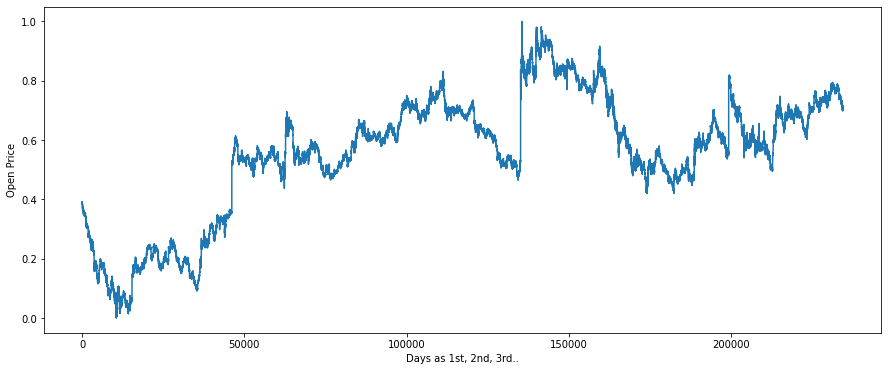

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

<a id="5"></a>
## 5.Creating X_train and y_train from Train data

* We have train data composed of stock open prices over days
* So, it has 1184 prices corresponding 1184 days
* My aim is to predict the open price of the next day.
* I can use a time step of 50 days.
* I will pick first 50 open prices (0 to 50), 1st 50 price will be in X_train data
* Then predict the price of 51th day; and 51th price will be in y_train data
* Again, i will pick prices from 1 to 51, those will be in X_train data
* Then predict the next days price, 52nd price will be in y_train data

In [ ]:
X_train50 = []
y_train50 = []
X_train30 = []
y_train30 = []
X_train70 = []
y_train70 = []

time_step = 50
for i in range(time_step, length_train):
    X_train50.append(dataset_train_scaled[i-time_step:i,0])
    y_train50.append(dataset_train_scaled[i,0])    
X_train50, y_train50 = np.array(X_train50), np.array(y_train50)

time_step = 30
for i in range(time_step, length_train):
    X_train30.append(dataset_train_scaled[i-time_step:i,0])
    y_train30.append(dataset_train_scaled[i,0])    
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)

time_step = 70
for i in range(time_step, length_train):
    X_train70.append(dataset_train_scaled[i-time_step:i,0])
    y_train70.append(dataset_train_scaled[i,0])    
X_train70, y_train70 = np.array(X_train70), np.array(y_train70)


In [ ]:
print("Shape of X_train50 before reshape :",X_train50.shape)
print("Shape of y_train50 before reshape :",y_train50.shape)

print("Shape of X_train30 before reshape :",X_train30.shape)
print("Shape of y_train30 before reshape :",y_train30.shape)


print("Shape of X_train70 before reshape :",X_train70.shape)
print("Shape of y_train70 before reshape :",y_train70.shape)

Shape of X_train50 before reshape : (234435, 50)
Shape of y_train50 before reshape : (234435,)
Shape of X_train30 before reshape : (234455, 30)
Shape of y_train30 before reshape : (234455,)
Shape of X_train70 before reshape : (234415, 70)
Shape of y_train70 before reshape : (234415,)


## Reshape

In [ ]:
X_train50 = np.reshape(X_train50, (X_train50.shape[0], X_train50.shape[1],1))
y_train50 = np.reshape(y_train50, (y_train50.shape[0],1))

print("Shape of X_train50 after reshape :",X_train50.shape)
print("Shape of y_train50 after reshape :",y_train50.shape)

X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1],1))
y_train30 = np.reshape(y_train30, (y_train30.shape[0],1))

print("Shape of X_train after reshape :",X_train30.shape)
print("Shape of y_train after reshape :",y_train30.shape)

X_train70 = np.reshape(X_train70, (X_train70.shape[0], X_train70.shape[1],1))
y_train70 = np.reshape(y_train70, (y_train70.shape[0],1))

print("Shape of X_train after reshape :",X_train70.shape)
print("Shape of y_train after reshape :",y_train70.shape)

Shape of X_train50 after reshape : (234435, 50, 1)
Shape of y_train50 after reshape : (234435, 1)
Shape of X_train after reshape : (234455, 30, 1)
Shape of y_train after reshape : (234455, 1)
Shape of X_train after reshape : (234415, 70, 1)
Shape of y_train after reshape : (234415, 1)


* Shape of X_train : 1134 x 50 x 1
* That means we have 1134 rows, each row has 50 rows and 1 column
* Lets check the first row: it has 50 rows (open prices of 49 days)

* Check the first item in y_train
* It is the price of 50th day

In [ ]:
y_train[0]

array([0.38809702])

<a id="6"></a>
## 6.Creating RNN model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


regressor50 = Sequential()

regressor50.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train50.shape[1],1))
             )

# regressor.add(
#     Dropout(0.2)
#              )

# regressor.add(
#     SimpleRNN(units = 50, 
#               activation = "tanh", 
#               return_sequences = True)
            #  )

regressor50.add(
    Dropout(0.2)
             )

regressor50.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor50.add(
    Dropout(0.2)
             )

regressor50.add(
    SimpleRNN(units = 50)
             )

regressor50.add(
    Dropout(0.2)
             )

regressor50.add(Dense(units = 1))

regressor50.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history50 = regressor50.fit(X_train50, y_train50, epochs = 2)

Epoch 1/2
7327/7327 [==============================] - 1003s 137ms/step - loss: 0.0060 - accuracy: 8.5311e-06
Epoch 2/2
7327/7327 [==============================] - 873s 119ms/step - loss: 4.3500e-04 - accuracy: 8.5311e-06


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


regressor30 = Sequential()

regressor30.add(
    SimpleRNN(units = 30, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train30.shape[1],1))
             )

# regressor.add(
#     Dropout(0.2)
#              )

# regressor.add(
#     SimpleRNN(units = 50, 
#               activation = "tanh", 
#               return_sequences = True)
            #  )

regressor30.add(
    Dropout(0.2)
             )

regressor30.add(
    SimpleRNN(units = 30, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor30.add(
    Dropout(0.2)
             )

regressor30.add(
    SimpleRNN(units = 30)
             )

regressor30.add(
    Dropout(0.2)
             )

regressor30.add(Dense(units = 1))

regressor30.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history30 = regressor30.fit(X_train30, y_train30, epochs = 2)

Epoch 1/2
7327/7327 [==============================] - 550s 75ms/step - loss: 0.0068 - accuracy: 8.5304e-06
Epoch 2/2
7327/7327 [==============================] - 541s 74ms/step - loss: 6.1552e-04 - accuracy: 8.5304e-06


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


regressor70 = Sequential()

regressor70.add(
    SimpleRNN(units = 70, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train70.shape[1],1))
             )

# regressor.add(
#     Dropout(0.2)
#              )

# regressor.add(
#     SimpleRNN(units = 50, 
#               activation = "tanh", 
#               return_sequences = True)
            #  )

regressor70.add(
    Dropout(0.2)
             )

regressor70.add(
    SimpleRNN(units = 70, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor70.add(
    Dropout(0.2)
             )

regressor70.add(
    SimpleRNN(units = 50)
             )

regressor70.add(
    Dropout(0.2)
             )

regressor70.add(Dense(units = 1))

regressor70.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history70 = regressor70.fit(X_train70, y_train70, epochs = 2)

Epoch 1/2
7326/7326 [==============================] - 1295s 177ms/step - loss: 0.0051 - accuracy: 8.5319e-06
Epoch 2/2
7326/7326 [==============================] - 1245s 170ms/step - loss: 4.0989e-04 - accuracy: 8.5319e-06


<a id="7"></a>
## 7.Evaluating Model

In [ ]:
history50.history["loss"]

[0.0060394443571567535, 0.00043500371975824237]

In [ ]:
history30.history["loss"]

[0.006828046403825283, 0.0006155245355330408]

In [ ]:
history70.history["loss"]

[0.005137397907674313, 0.00040988565888255835]

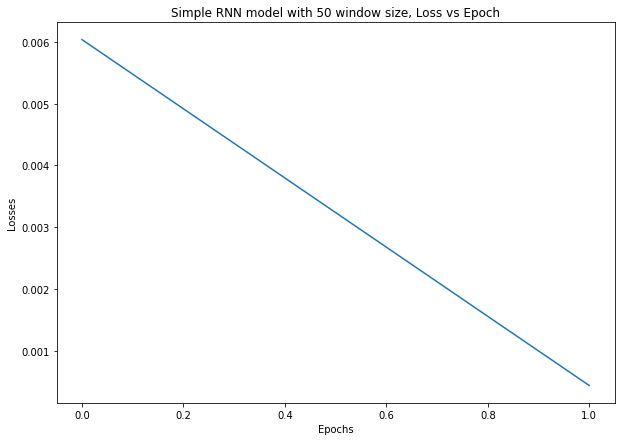

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history50.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model with 50 window size, Loss vs Epoch")
plt.show()

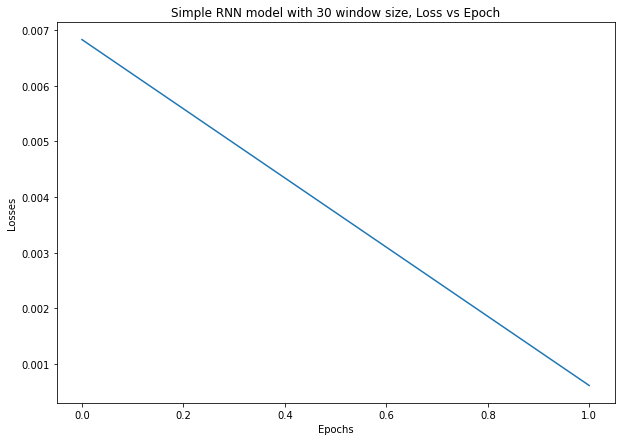

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history30.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model with 30 window size, Loss vs Epoch")
plt.show()

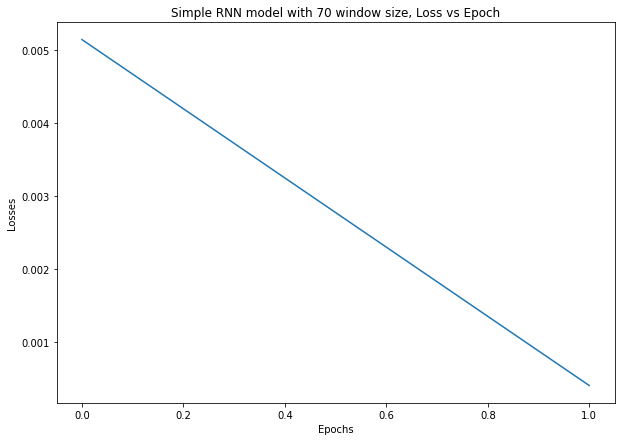

In [ ]:
plt.figure(figsize =(10,7))
plt.plot(history70.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model with 70 window size, Loss vs Epoch")
plt.show()

## Model predictions for train data 

7327/7327 [==============================] - 97s 13ms/step


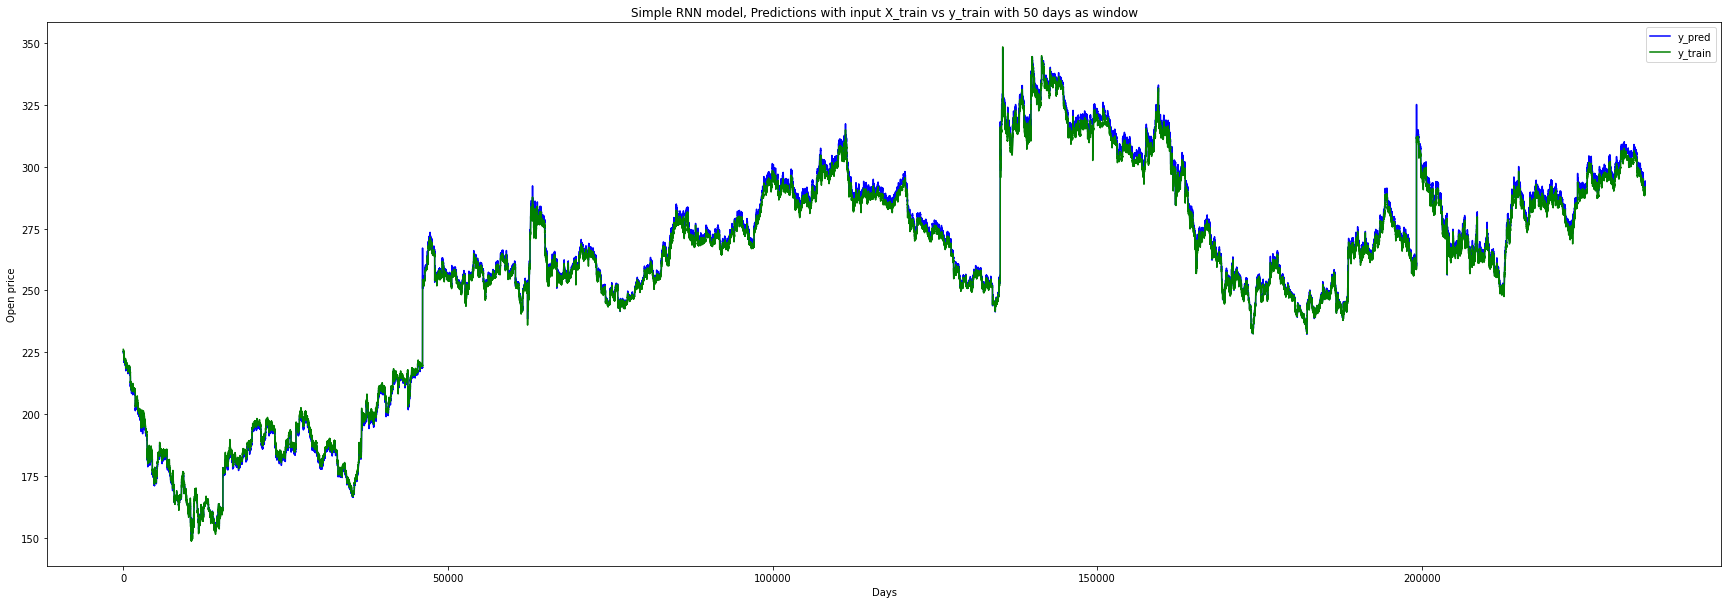

In [ ]:
y_pred50 = regressor50.predict(X_train50)  # predictions
y_pred50 = scaler.inverse_transform(y_pred50) # scaling back from 0-1 to original
y_pred50.shape

y_train50 = scaler.inverse_transform(y_train50) # scaling back from 0-1 to original
y_train50.shape
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred50, color = "b", label = "y_pred" )
plt.plot(y_train50, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train with 50 days as window")
plt.legend()
plt.show()


7327/7327 [==============================] - 66s 9ms/step


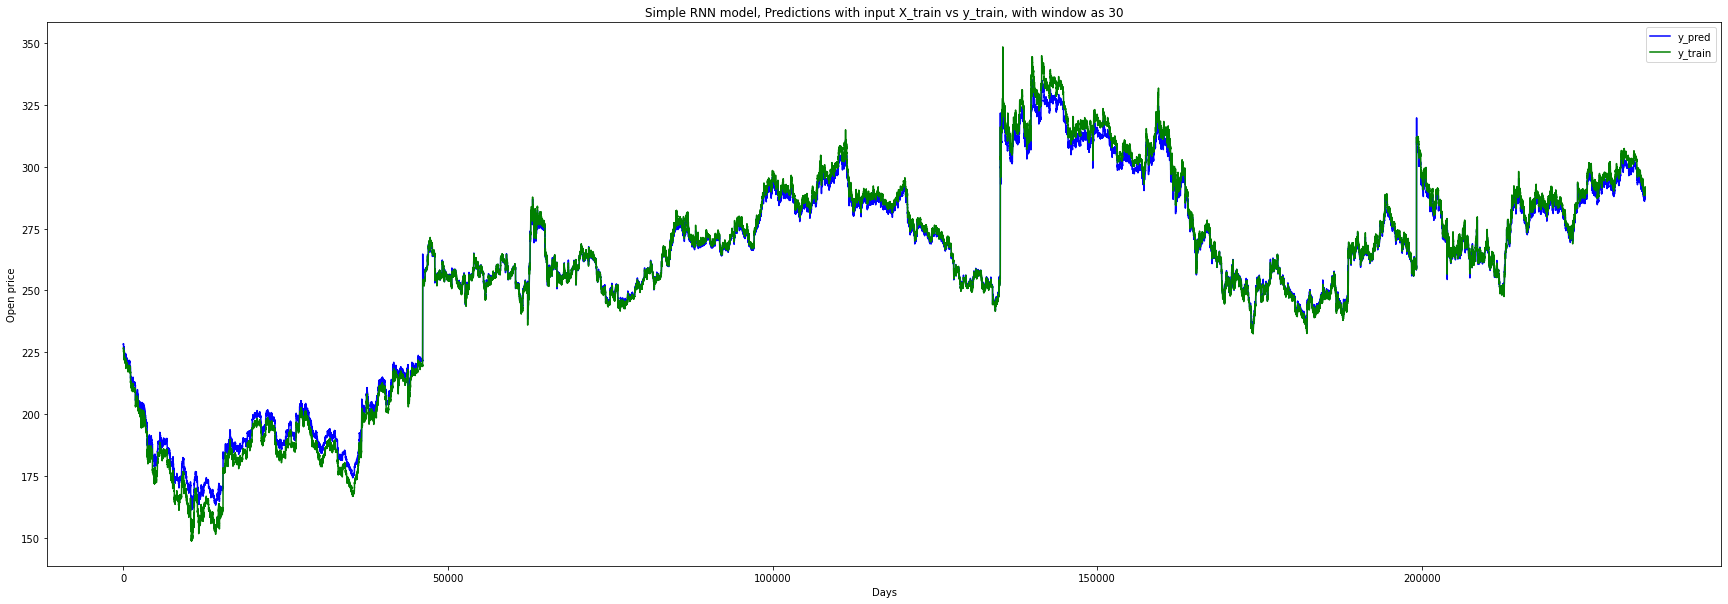

In [ ]:
y_pred30 = regressor30.predict(X_train30)  # predictions
y_pred30 = scaler.inverse_transform(y_pred30) # scaling back from 0-1 to original
y_pred30.shape

y_train30 = scaler.inverse_transform(y_train30) # scaling back from 0-1 to original
y_train30.shape
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred30, color = "b", label = "y_pred" )
plt.plot(y_train30, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train, with window as 30")
plt.legend()
plt.show()


7326/7326 [==============================] - 131s 18ms/step


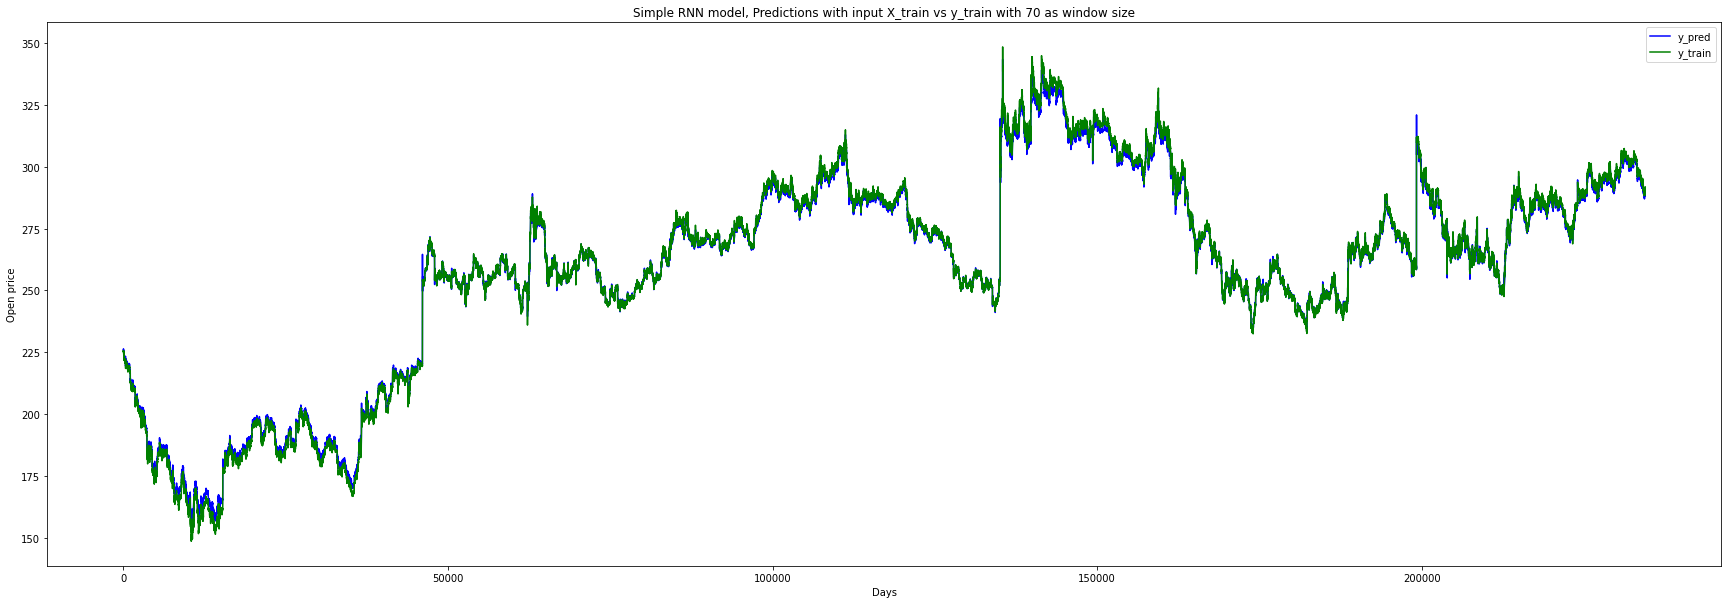

In [ ]:
y_pred70 = regressor70.predict(X_train70)  # predictions
y_pred70 = scaler.inverse_transform(y_pred70) # scaling back from 0-1 to original
y_pred70.shape

y_train70 = scaler.inverse_transform(y_train70) # scaling back from 0-1 to original
y_train70.shape
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred70, color = "b", label = "y_pred" )
plt.plot(y_train70, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train with 70 as window size")
plt.legend()
plt.show()


<a id="8"></a>
## 8.Creating Test Dataset from Validation Data 

### Converting array and scaling

In [ ]:
dataset_validation = validation_data.Open.values 
dataset_validation = np.reshape(dataset_validation, (-1,1))
scaled_dataset_validation =  scaler.fit_transform(dataset_validation) 
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (100493, 1)


### Creating X_test and y_test

In [ ]:
X_test50 = []
y_test50 = []
time_step = 50
for i in range(time_step, length_validation):
    X_test50.append(scaled_dataset_validation[i-time_step:i,0])
    y_test50.append(scaled_dataset_validation[i,0])

X_test30 = []
y_test30 = []
time_step = 30
for i in range(time_step, length_validation):
    X_test30.append(scaled_dataset_validation[i-time_step:i,0])
    y_test30.append(scaled_dataset_validation[i,0])

X_test70 = []
y_test70 = []
time_step = 70
for i in range(time_step, length_validation):
    X_test70.append(scaled_dataset_validation[i-time_step:i,0])
    y_test70.append(scaled_dataset_validation[i,0])

### Converting to array

In [ ]:
X_test50, y_test50 = np.array(X_test50), np.array(y_test50)
X_test30, y_test30 = np.array(X_test30), np.array(y_test30)
X_test70, y_test70 = np.array(X_test70), np.array(y_test70)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (100423, 70)
Shape of y_test before reshape : (100423,)


### Reshape

In [ ]:
X_test50 = np.reshape(X_test50, (X_test50.shape[0],X_test50.shape[1],1)) 
y_test50 = np.reshape(y_test50, (-1,1)) 

X_test30 = np.reshape(X_test30, (X_test30.shape[0],X_test30.shape[1],1)) 
y_test30 = np.reshape(y_test30, (-1,1)) 

X_test70 = np.reshape(X_test70, (X_test70.shape[0],X_test70.shape[1],1)) 
y_test70 = np.reshape(y_test70, (-1,1)) 

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (100423, 70, 1)
Shape of y_test after reshape : (100423, 1)


<a id="9"></a>
## 9.Evaluating with Validation Data 

3139/3139 [==============================] - 45s 14ms/step
Shape of y_pred_of_test : (100443, 1)


3139/3139 [==============================] - 57s 18ms/step
Shape of y_pred_of_test : (100423, 1)


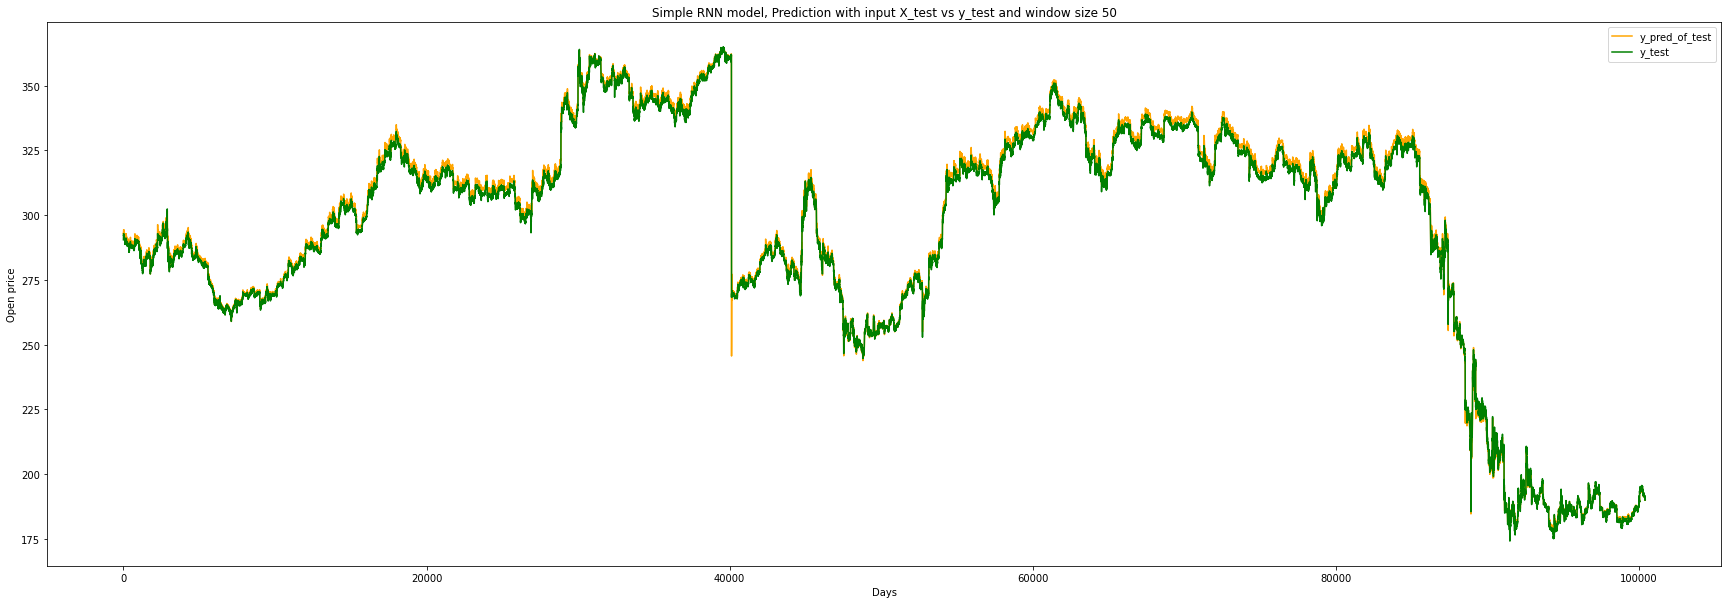

In [ ]:
y_pred_of_test = regressor50.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test and window size 50")
plt.legend()
plt.show()

3139/3139 [==============================] - 59s 19ms/step
Shape of y_pred_of_test : (100423, 1)


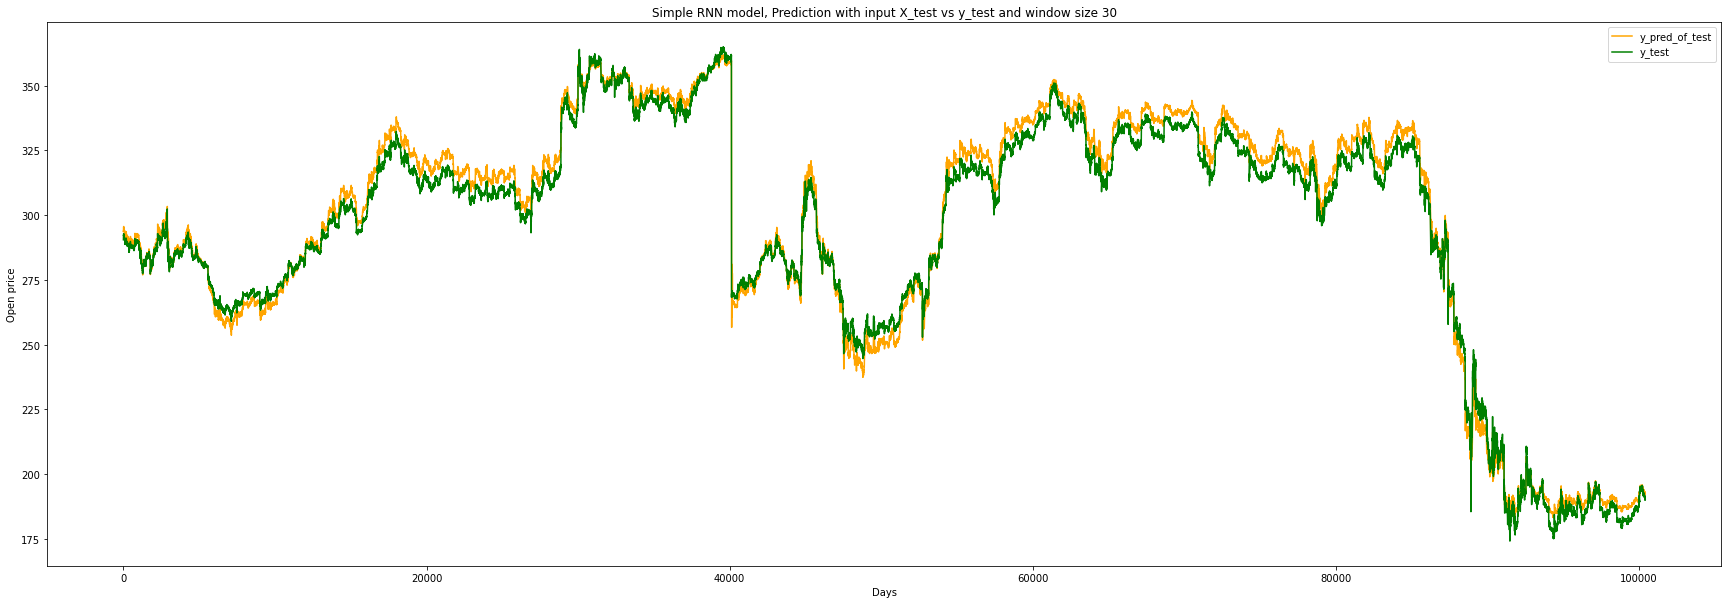

In [ ]:
y_pred_of_test = regressor30.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test and window size 30")
plt.legend()
plt.show()

3139/3139 [==============================] - 58s 18ms/step
Shape of y_pred_of_test : (100423, 1)


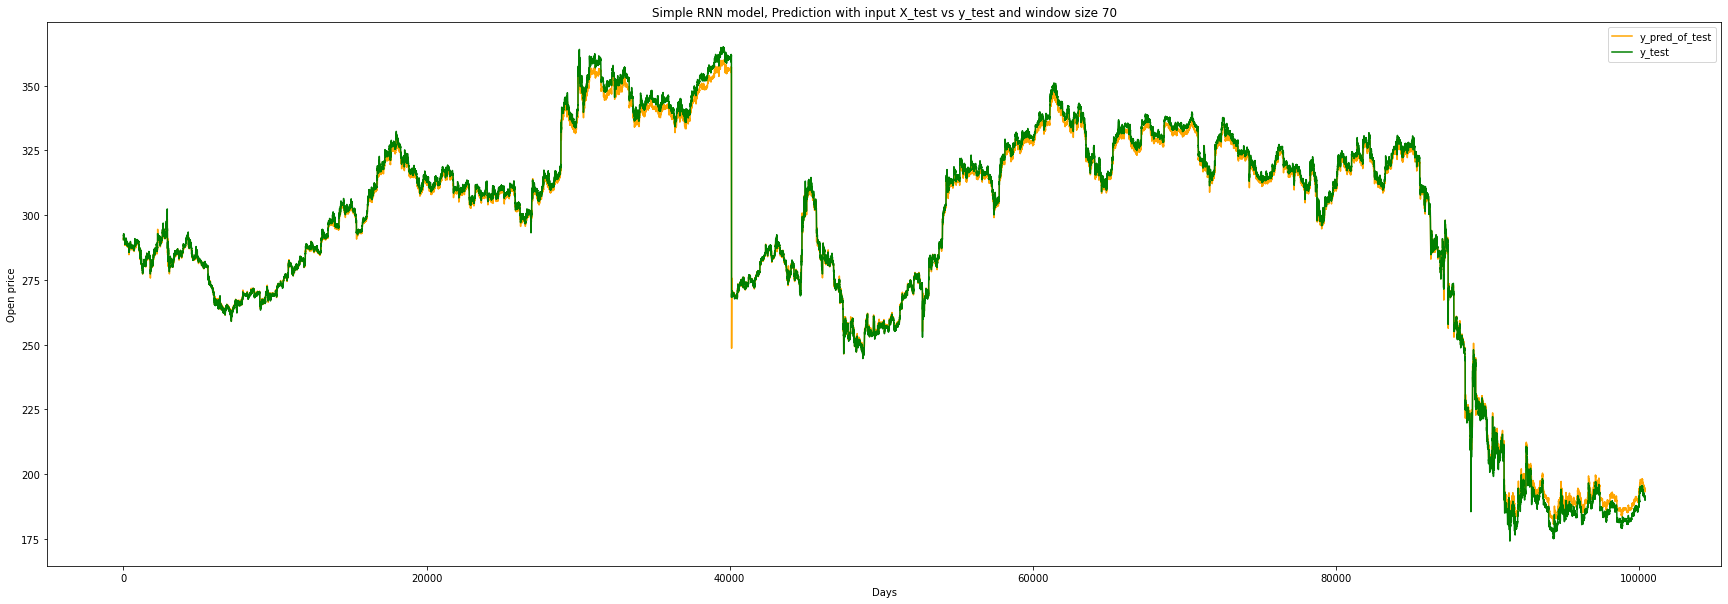

In [ ]:
y_pred_of_test = regressor70.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test and window size 70")
plt.legend()
plt.show()

<a id="10"></a>
## 10.Creating LSTM Model

In [ ]:
y_train = scaler.fit_transform(y_train)
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) 
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 2)


In [ ]:
y_train50 = scaler.fit_transform(y_train50)
from keras.layers import LSTM

model_lstm50 = Sequential()
model_lstm50.add(
    LSTM(64,return_sequences=True,input_shape = (X_train50.shape[1],1))) 
model_lstm50.add(
    LSTM(64, return_sequences= False))
model_lstm50.add(Dense(32))
model_lstm50.add(Dense(1))
model_lstm50.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history502 = model_lstm50.fit(X_train50, y_train50, epochs = 2)


Epoch 1/2
7327/7327 [==============================] - 83s 11ms/step - loss: 1.9085e-04 - accuracy: 8.5311e-06
Epoch 2/2
7327/7327 [==============================] - 72s 10ms/step - loss: 1.2384e-05 - accuracy: 8.5311e-06


In [ ]:
y_train30 = scaler.fit_transform(y_train30)

model_lstm30 = Sequential()
model_lstm30.add(
    LSTM(64,return_sequences=True,input_shape = (X_train30.shape[1],1))) 
model_lstm30.add(
    LSTM(64, return_sequences= False))
model_lstm30.add(Dense(32))
model_lstm30.add(Dense(1))
model_lstm30.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history302 = model_lstm30.fit(X_train30, y_train30, epochs = 2)


Epoch 1/2
7327/7327 [==============================] - 62s 8ms/step - loss: 1.0115e-04 - accuracy: 8.5304e-06
Epoch 2/2
7327/7327 [==============================] - 63s 9ms/step - loss: 1.2080e-05 - accuracy: 8.5304e-06


In [ ]:
y_train70 = scaler.fit_transform(y_train70)
from keras.layers import LSTM

model_lstm70 = Sequential()
model_lstm70.add(
    LSTM(64,return_sequences=True,input_shape = (X_train70.shape[1],1))) 
model_lstm70.add(
    LSTM(64, return_sequences= False))
model_lstm70.add(Dense(32))
model_lstm70.add(Dense(1))
model_lstm70.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm70.fit(X_train70, y_train70, epochs = 2)


Epoch 1/2
7326/7326 [==============================] - 78s 10ms/step - loss: 1.8202e-04 - accuracy: 8.5319e-06
Epoch 2/2
7326/7326 [==============================] - 68s 9ms/step - loss: 1.1426e-05 - accuracy: 8.5319e-06


<a id="11"></a>
## 11.Evaluating LSTM Model

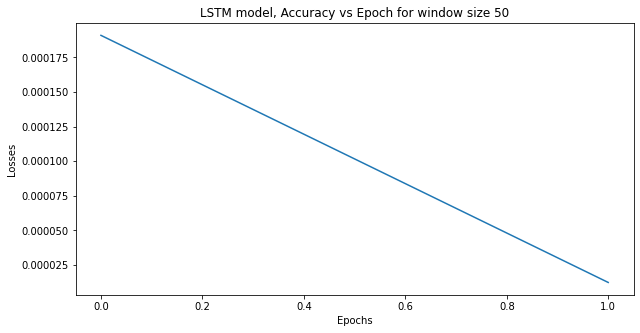

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history502.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch for window size 50")
plt.show()

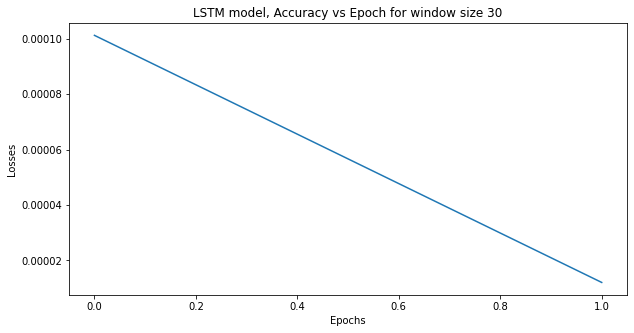

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history302.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch for window size 30")
plt.show()

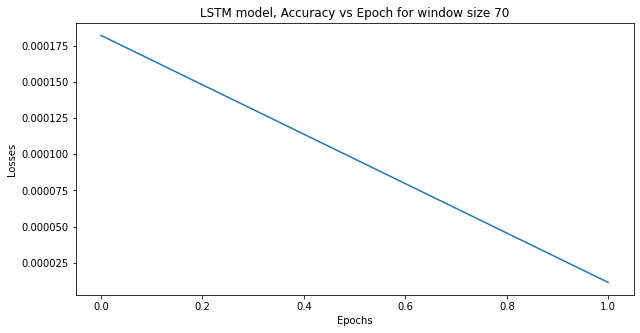

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch for window size 70")
plt.show()

3139/3139 [==============================] - 11s 4ms/step


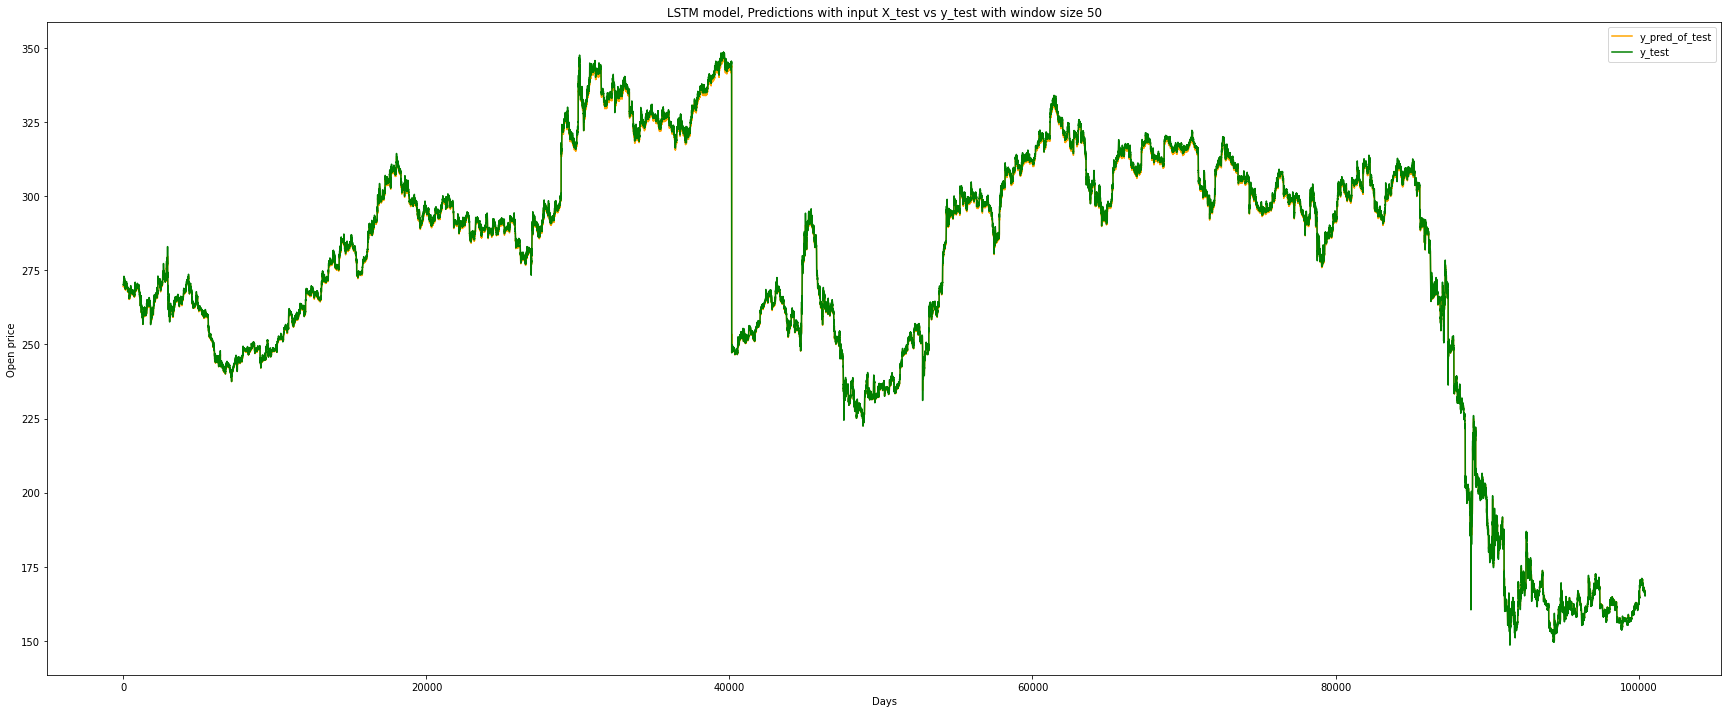

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm50.predict(X_test50)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test50), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test with window size 50")
plt.legend()
plt.show()

3140/3140 [==============================] - 10s 3ms/step


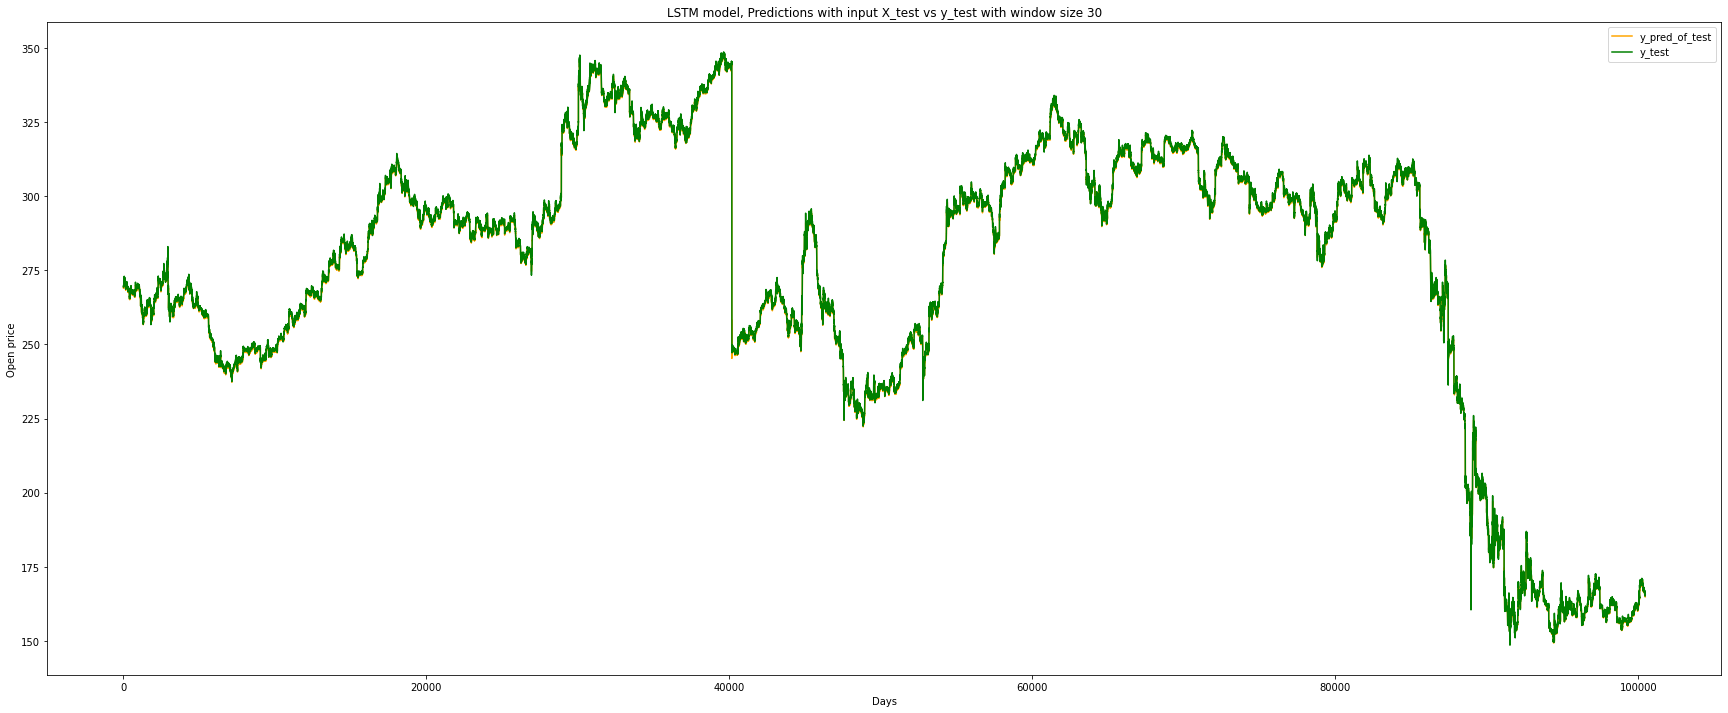

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm30.predict(X_test30)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test30), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test with window size 30")
plt.legend()
plt.show()

3139/3139 [==============================] - 13s 4ms/step


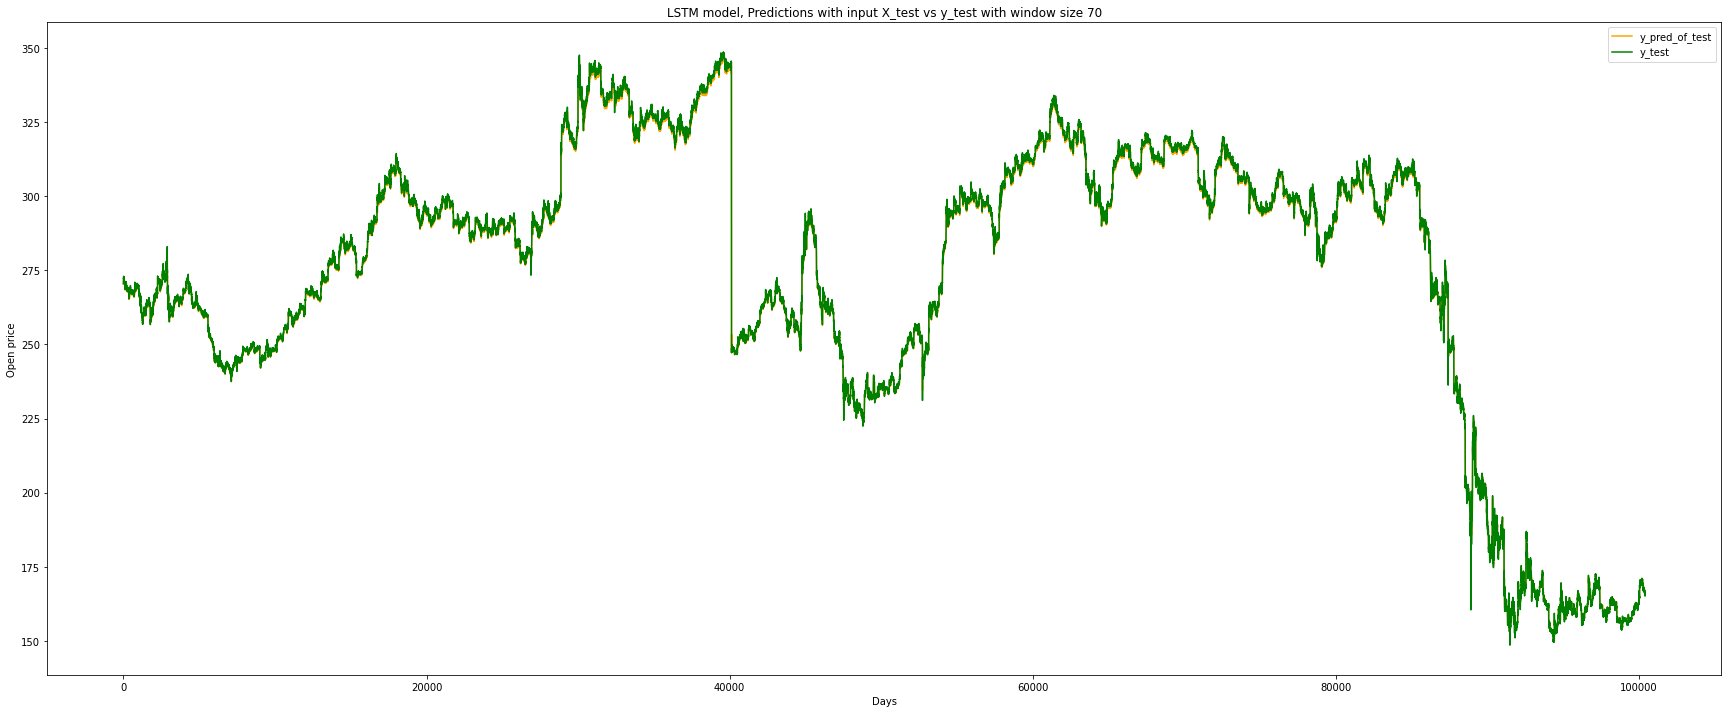

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm50.predict(X_test70)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test70), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test with window size 70")
plt.legend()
plt.show()

<a id="12"></a>
## 12.Future price prediction

In [ ]:
data.iloc[-1]

Open                         190.15
High                          190.2
Low                           190.0
Close                        190.05
Volume                       195065
Data      2020-04-30 15:29:00+05:30
Name: 2020-04-30 15:29:00+05:30, dtype: object

In [ ]:
time_step = 50
X_input = data.iloc[-time_step:].Open.values      
X_input = scaler.fit_transform(X_input.reshape(-1,1))    
X_input = np.reshape(X_input, (1,50,1))    
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[1.        ],
        [1.        ],
        [0.91891892],
        [0.97297297],
        [0.89189189],
        [0.91891892],
        [0.72972973],
        [0.64864865],
        [0.67567568],
        [0.67567568],
        [0.67567568],
        [0.59459459],
        [0.59459459],
        [0.62162162],
        [0.56756757],
        [0.43243243],
        [0.37837838],
        [0.24324324],
        [0.13513514],
        [0.08108108],
        [0.10810811],
        [0.40540541],
        [0.56756757],
        [0.59459459],
        [0.62162162],
        [0.64864865],
        [0.72972973],
        [0.78378378],
        [0.78378378],
        [0.72972973],
        [0.56756757],
        [0.32432432],
        [0.24324324],
        [0.27027027],
        [0.27027027],
        [0.35135135],
        [0.27027027],
        [0.18918919],
        [0.16216216],
        [0.21621622],
        [0.21621622],
        [0.16216216],
        [0.21621622],
        [0.        ],
        [0.16216216],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor50.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm50.predict(X_input))
print("with window size 50")
print("Simple RNN, Open price prediction for next day/min:", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for next day/min:", LSTM_prediction[0,0])

1/1 [==============================] - 0s 20ms/step
with window size 50
Simple RNN, Open price prediction for next day/min: 190.12128
LSTM prediction, Open price prediction for next day/min: 190.11337


In [ ]:
time_step = 30
X_input = data.iloc[-time_step:].Open.values      
X_input = scaler.fit_transform(X_input.reshape(-1,1))    
X_input = np.reshape(X_input, (1,30,1))    
print("Shape of X_input :", X_input.shape)
X_input

simple_RNN_prediction = scaler.inverse_transform(regressor30.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm30.predict(X_input))
print("with window size 30")

print("Simple RNN, Open price prediction for next day/min:", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for next day/min:", LSTM_prediction[0,0])

Shape of X_input : (1, 30, 1)
1/1 [==============================] - 0s 22ms/step
with window size 30
Simple RNN, Open price prediction for next day/min: 190.05763
LSTM prediction, Open price prediction for next day/min: 190.1199


In [ ]:
time_step = 70
X_input = data.iloc[-time_step:].Open.values      
X_input = scaler.fit_transform(X_input.reshape(-1,1))    
X_input = np.reshape(X_input, (1,70,1))    
print("Shape of X_input :", X_input.shape)
X_input
simple_RNN_prediction = scaler.inverse_transform(regressor70.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm70.predict(X_input))
print("with window size 70")

print("Simple RNN, Open price prediction for next day/min:", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for next day/min:", LSTM_prediction[0,0])

Shape of X_input : (1, 70, 1)
1/1 [==============================] - 0s 31ms/step
with window size 70
Simple RNN, Open price prediction for next day/min: 190.10123
LSTM prediction, Open price prediction for next day/min: 190.10652
